In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from datetime import datetime
import seaborn as sns 
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

In [8]:
dataframe=pd.read_csv('Files/Temperatura780.csv')
df = pd.read_csv('Files/Temperatura780.csv')

In [9]:
corriente = dataframe['Corriente2']
temperatura = dataframe['Temperatura']
corriente = corriente[33::1]
temperatura = temperatura[33::1]
corriente = corriente.to_numpy()
temperatura = temperatura.to_numpy()

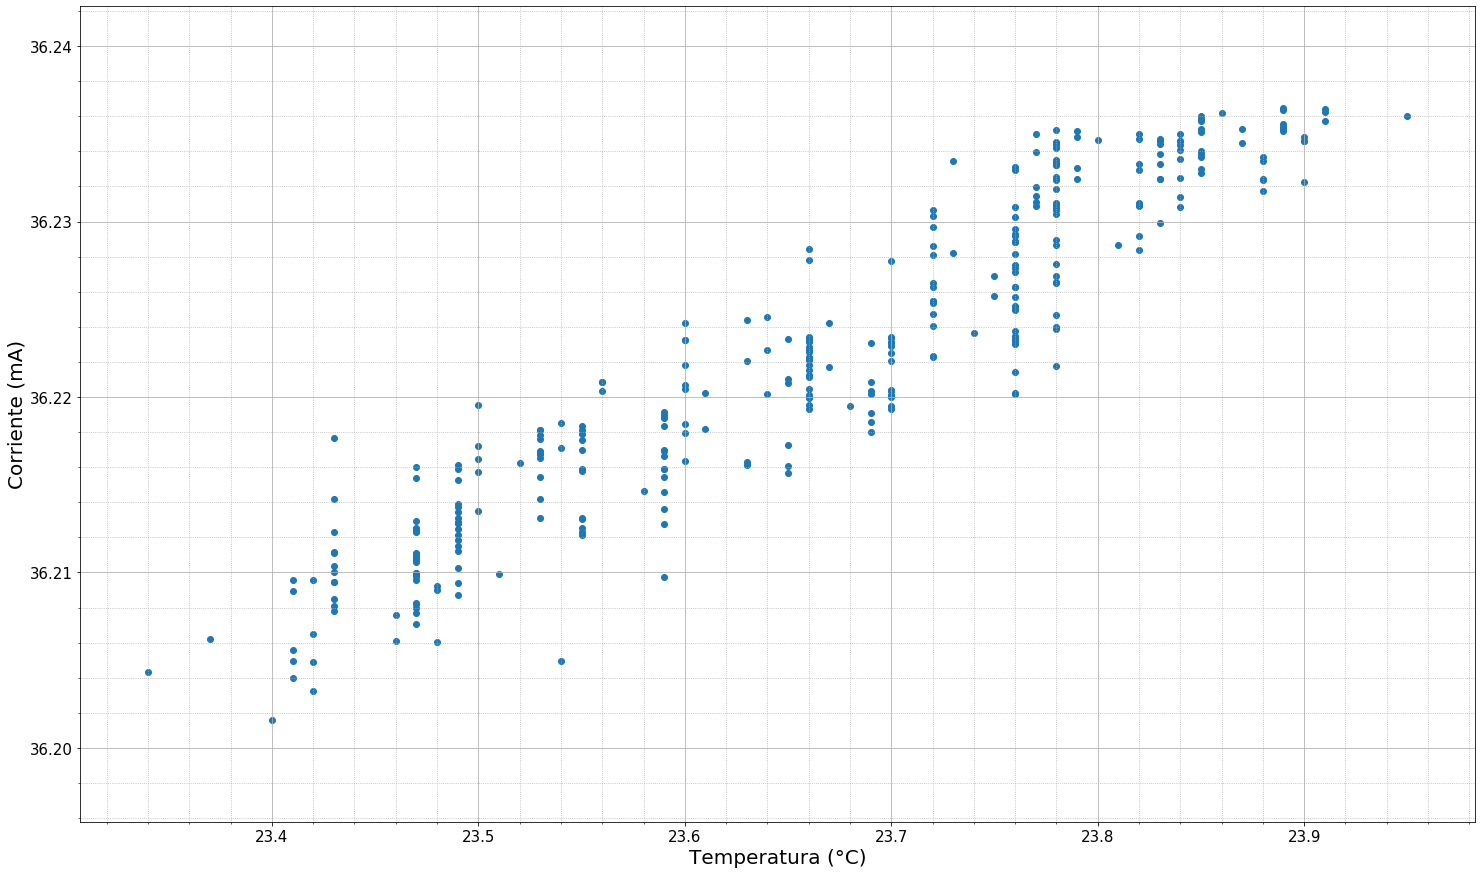

In [10]:
plt.figure(figsize=(25,15))
plt.minorticks_on()
plt.grid(which='major',linestyle='-')
plt.grid(which='minor',linestyle=':')
plt.xlabel('Temperatura (°C)', fontsize=20)
plt.ylabel('Corriente (mA)', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
#plt.ylim(0,65)
#plt.xlim(25.7,26.3)
plt.scatter(temperatura,corriente)
plt.show()

In [55]:
df_binary = df[['Corriente2', 'Temperatura']] 
df_binary.columns = ['Corriente', 'Temperatura'] 

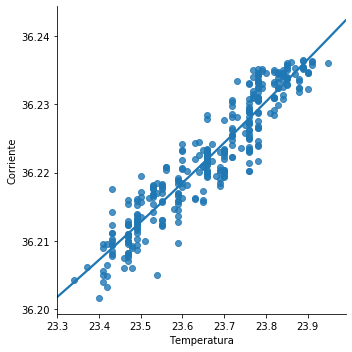

In [56]:
df_binarysep = df_binary[:][33:]
sns.lmplot(x ="Temperatura", y ="Corriente", data = df_binarysep, order = 2, ci = None)

In [57]:
df_binarysep.fillna(method ='ffill', inplace = True) 

In [61]:
X = np.array(df_binarysep['Temperatura']).reshape(-1, 1) 
y = np.array(df_binarysep['Corriente']).reshape(-1, 1) 
devst = np.std(y)
print(devst)
# Seperating the data into independent and dependent variables 
# Converting each dataframe into a numpy array  
# since each dataframe contains only one column 
df_binarysep.dropna(inplace = True) 
  
# Dropping any rows with Nan values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
  
# Splitting the data into training and testing data 
regr = LinearRegression() 
  
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test)) 
print('Slope:', regr.coef_)
print('Intercepto:', regr.intercept_)

0.008918698221445394
0.8882653757739729
Slope: [[0.05861441]]
Intercepto: [34.83532518]


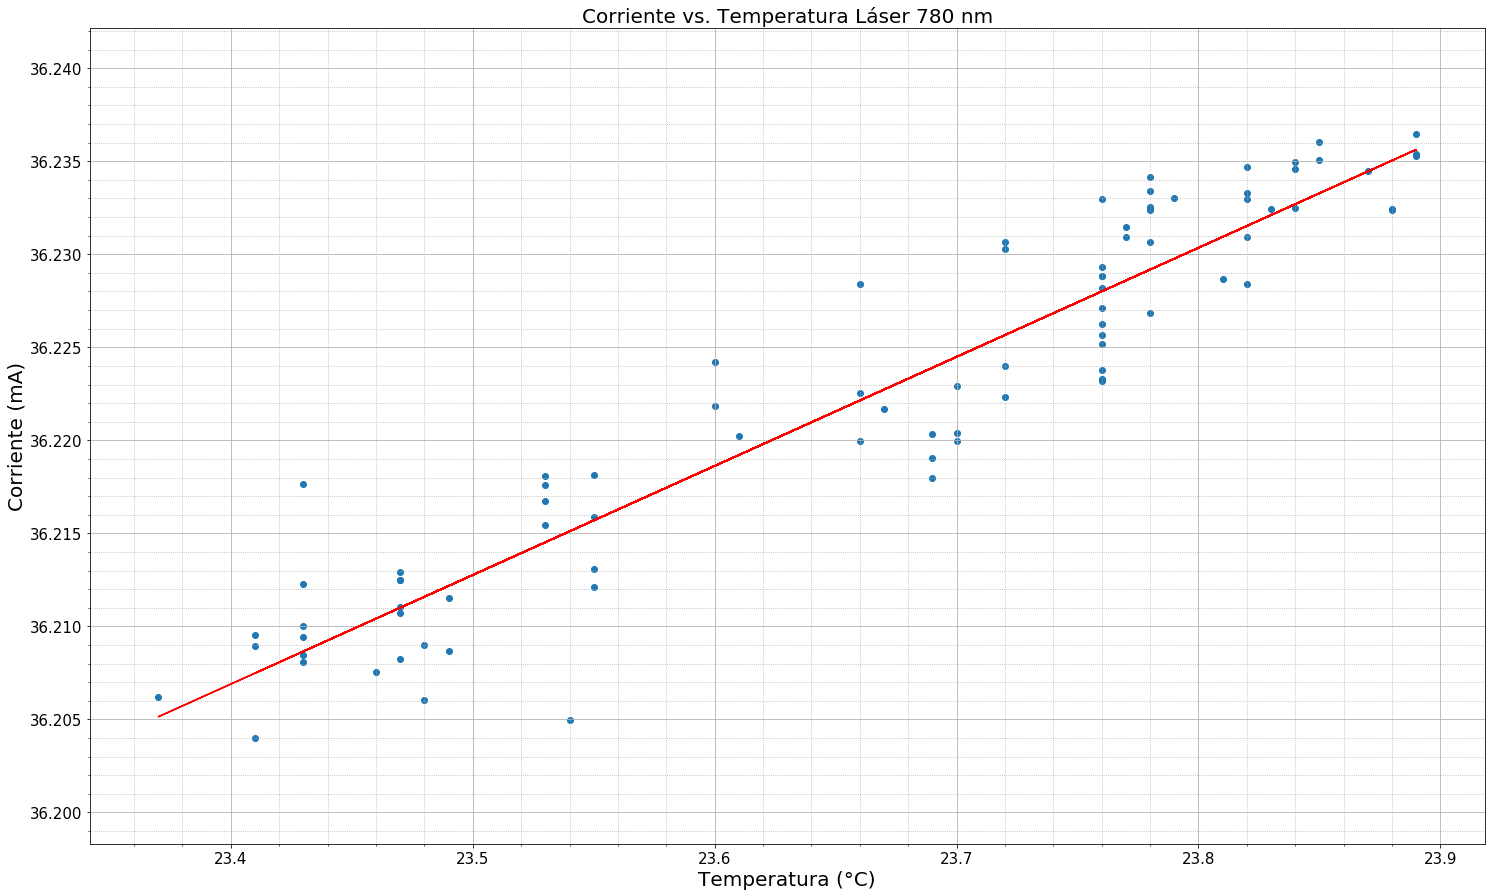

In [70]:
y_pred = regr.predict(X_test) 
#plt.ylim(0.042,0.043)
#plt.xlim(25.7,26.3)
plt.figure(figsize=(25,15))
plt.title('Corriente vs. Temperatura Láser 780 nm', fontsize=20)
plt.minorticks_on()
plt.grid(which='major',linestyle='-')
plt.grid(which='minor',linestyle=':')
plt.xlabel('Temperatura (°C)', fontsize=20)
plt.ylabel('Corriente (mA)', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.scatter(X_test, y_test) 
plt.plot(X_test, y_pred, color ='r') 
#plt.errorbar(X_test,y_pred, yerr=devst ,label='Corriente Promedio', linestyle='dashed',marker='o')

plt.show() 
# Data scatter of predicted values 
